## South German Credit Data Problem

### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

### Reading the South German Credit data set

In [3]:
#Read files
trainfile = r'C:\Users\dipti\Downloads\SouthGermanCredit.xlsx'
trainData = pd.read_excel(trainfile) #creates a dataframe

print(trainData.shape)
trainData.head()

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


### Counting unique values

In [4]:
trainData['kredit'].value_counts()

1    700
0    300
Name: kredit, dtype: int64

### Undersampling

In [5]:
train_0=trainData[trainData['kredit']==1]
len(train_0)

train_1=trainData[trainData['kredit']==0]
len(train_1)
#Undersampling with the length of train_1 to balance the data

trainData=pd.concat([train_1,train_0.sample(len(train_1))])
Counter(trainData['kredit'])

Counter({0: 300, 1: 300})

In [6]:
# Dropping the target column = kredit
X_train = trainData.drop('kredit',axis=1)
credit = trainData['kredit']

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 22 to 571
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   laufkont  600 non-null    int64
 1   laufzeit  600 non-null    int64
 2   moral     600 non-null    int64
 3   verw      600 non-null    int64
 4   hoehe     600 non-null    int64
 5   sparkont  600 non-null    int64
 6   beszeit   600 non-null    int64
 7   rate      600 non-null    int64
 8   famges    600 non-null    int64
 9   buerge    600 non-null    int64
 10  wohnzeit  600 non-null    int64
 11  verm      600 non-null    int64
 12  alter     600 non-null    int64
 13  weitkred  600 non-null    int64
 14  wohn      600 non-null    int64
 15  bishkred  600 non-null    int64
 16  beruf     600 non-null    int64
 17  pers      600 non-null    int64
 18  telef     600 non-null    int64
 19  gastarb   600 non-null    int64
dtypes: int64(20)
memory usage: 98.4 KB


In [8]:
X_train.describe()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.00000,600.000000,600.00000,600.000000,600.00000,600.000000
mean,2.358333,22.165000,2.453333,2.856667,3500.480000,1.995000,3.320000,3.015000,2.678333,1.146667,2.83500,2.438333,35.150000,2.643333,1.92500,1.411667,2.93000,1.843333,1.42000,1.975000
std,1.227100,12.281388,1.087717,2.805811,3020.379386,1.521677,1.208318,1.107619,0.715810,0.481881,1.09229,1.055804,11.278424,0.730533,0.55967,0.585464,0.67021,0.363789,0.49397,0.156255
min,1.000000,4.000000,0.000000,0.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,19.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.00000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1386.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.00000,1.000000,26.000000,3.000000,2.00000,1.000000,3.00000,2.000000,1.00000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2392.000000,1.000000,3.000000,3.000000,3.000000,1.000000,3.00000,3.000000,33.000000,3.000000,2.00000,1.000000,3.00000,2.000000,1.00000,2.000000
75%,4.000000,30.000000,4.000000,3.000000,4355.750000,3.000000,4.000000,4.000000,3.000000,1.000000,4.00000,3.000000,41.000000,3.000000,2.00000,2.000000,3.00000,2.000000,2.00000,2.000000
max,4.000000,72.000000,4.000000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.00000,4.000000,75.000000,3.000000,3.00000,4.000000,4.00000,2.000000,2.00000,2.000000


### Plotting the Pair Plot for training data

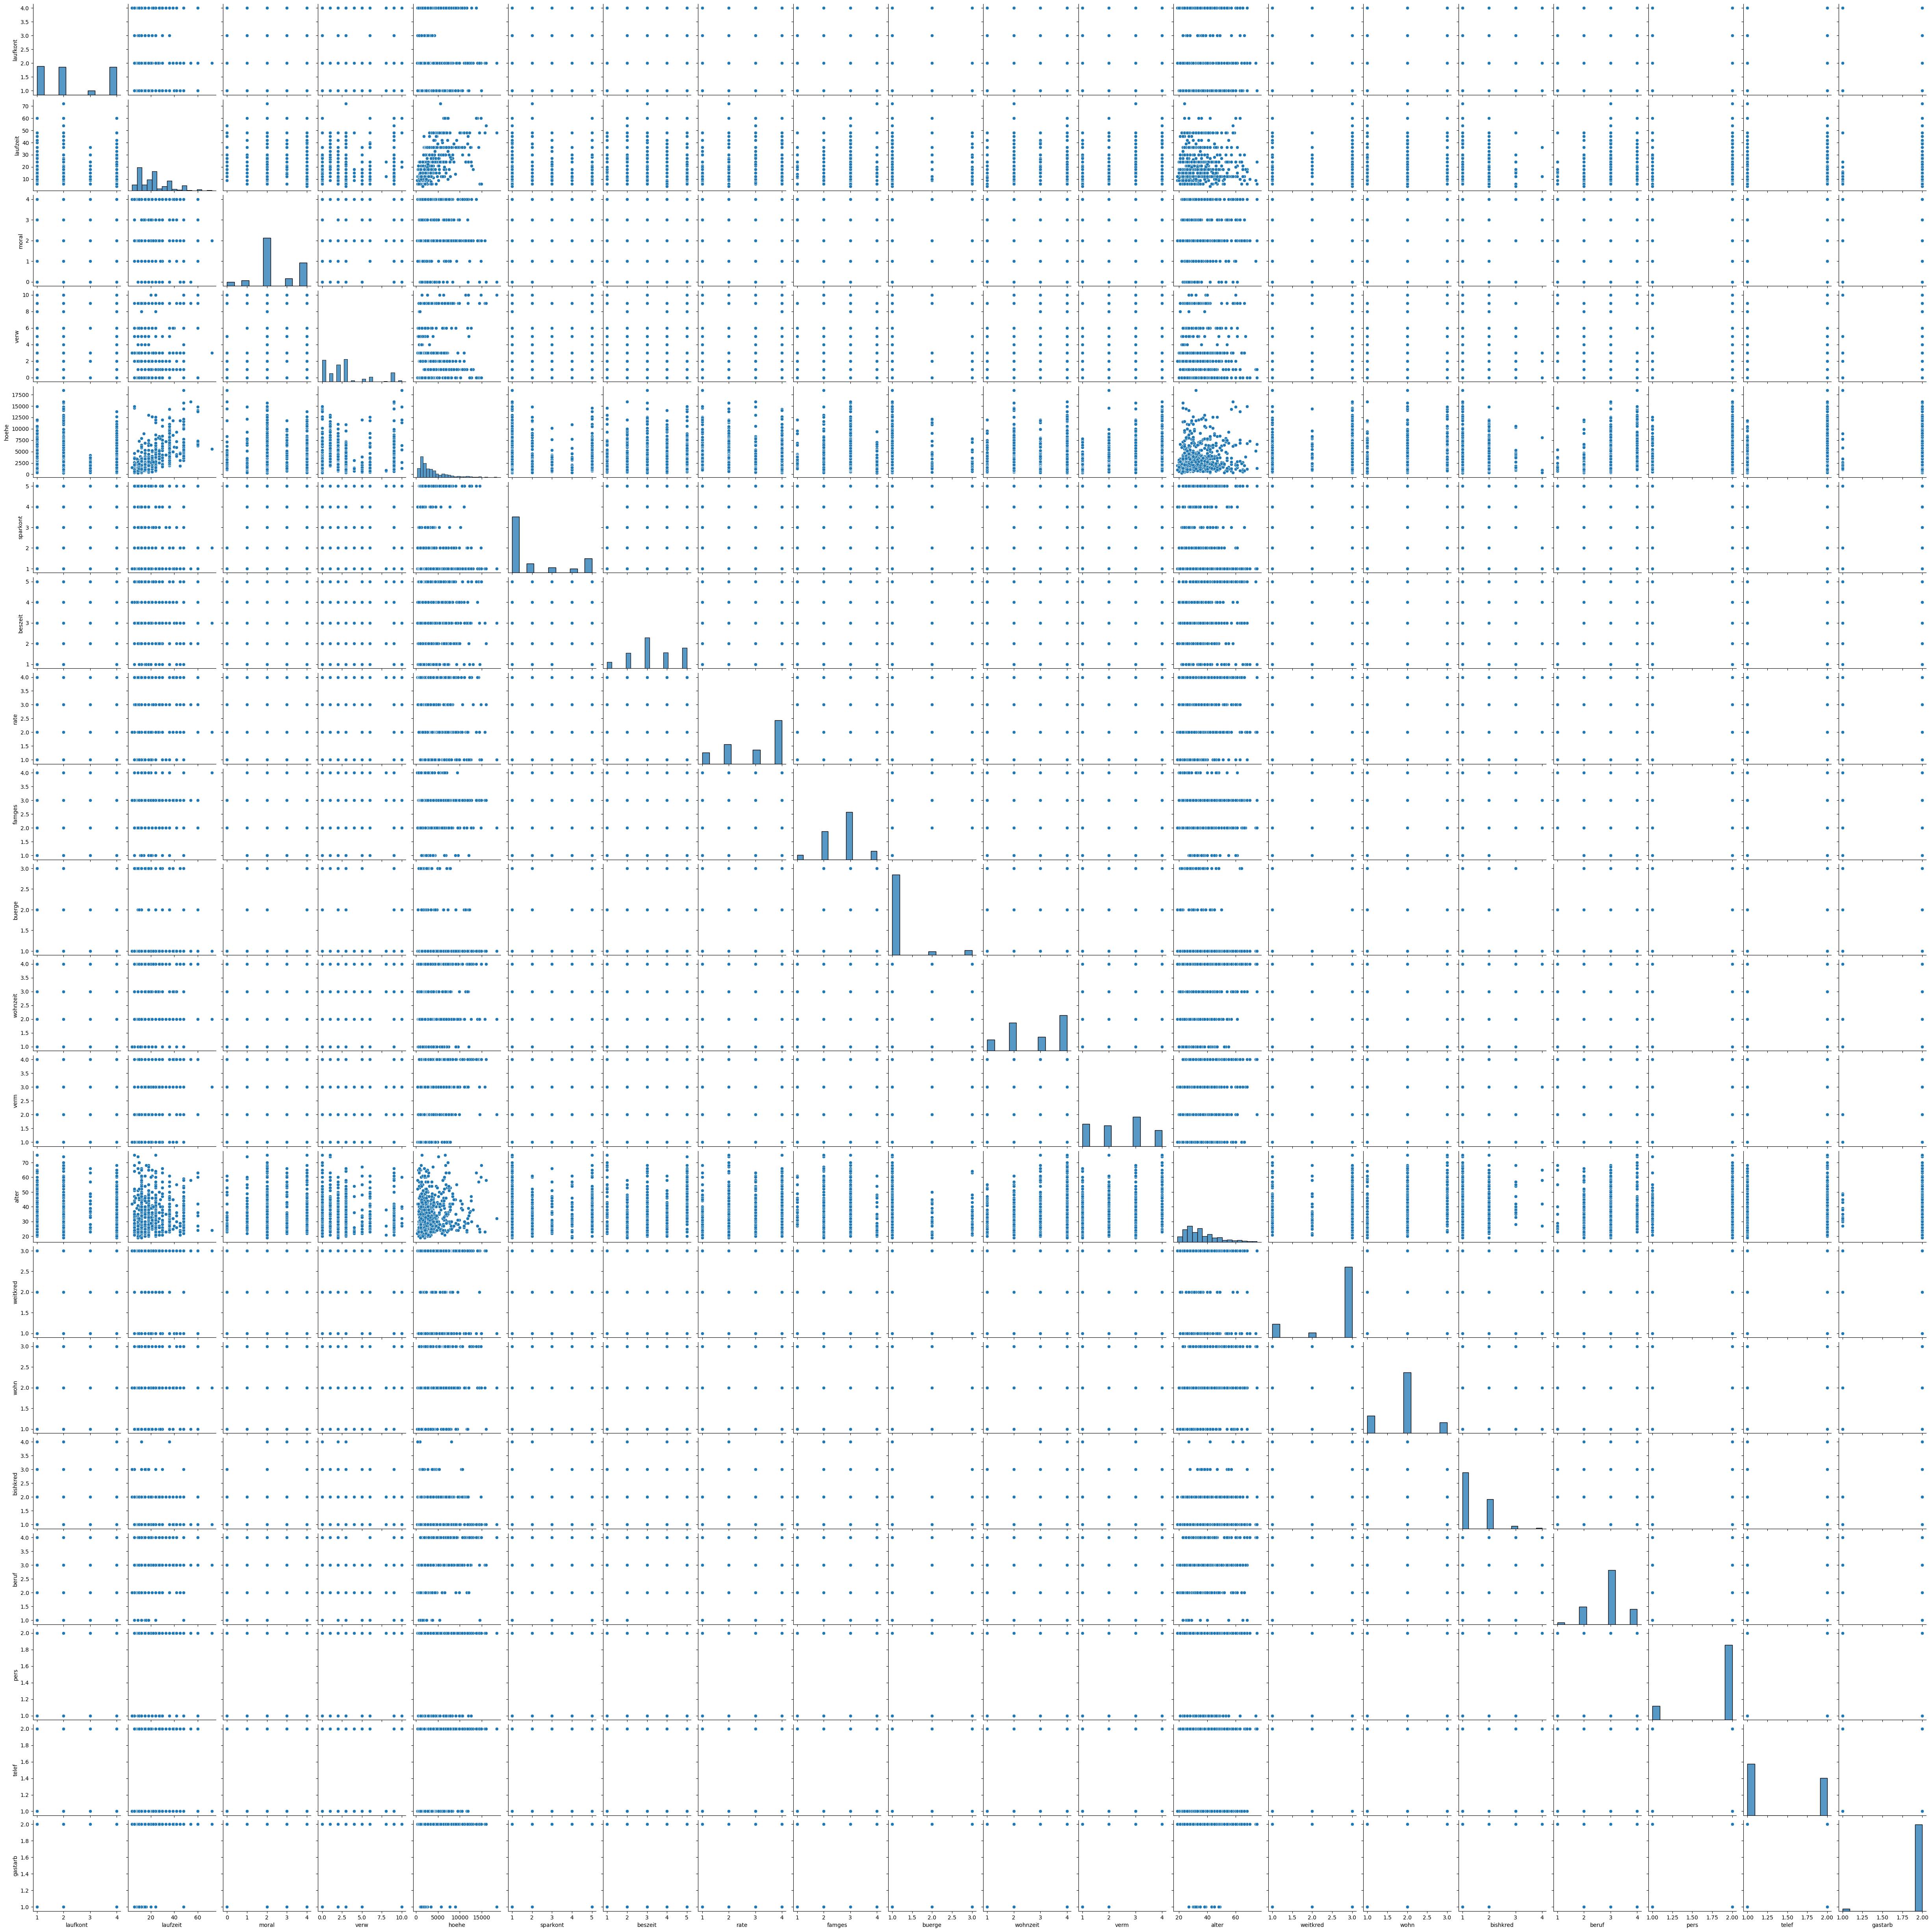

In [9]:
sns.pairplot(X_train)

In [10]:
X_train.isnull().sum()

laufkont    0
laufzeit    0
moral       0
verw        0
hoehe       0
sparkont    0
beszeit     0
rate        0
famges      0
buerge      0
wohnzeit    0
verm        0
alter       0
weitkred    0
wohn        0
bishkred    0
beruf       0
pers        0
telef       0
gastarb     0
dtype: int64

### Data Preprocessing 

In [11]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train = independent_scaler.fit_transform (X_train) #fit and transform

### K-Means Clustering

In [12]:
#K-Means Clustering ========================================================================
#Default Mode - K=8
kmeans = KMeans()
kmeans.fit(X_train)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))
print(X_train.shape)

[2 6 4 0 2 1 2 2 2 3 2 2 4 1 2 2 1 0 6 0 0 2 2 0 1 2 6 0 3 2 5 2 1 6 6 2 0
 1 2 6 4 1 1 2 1 3 5 6 0 1 2 2 1 6 0 2 4 2 3 6 6 1 5 1 1 2 3 4 2 2 2 2 2 0
 4 6 0 6 2 0 0 2 0 2 2 5 2 4 4 6 2 6 0 2 5 1 2 6 2 1 2 6 6 2 2 6 2 1 2 1 0
 1 6 2 1 2 1 2 6 6 0 0 6 2 6 2 1 3 2 6 0 0 5 2 6 6 4 0 1 2 5 4 6 0 0 4 4 0
 1 1 3 2 4 4 2 1 1 6 2 2 5 6 2 4 0 5 2 0 4 6 1 0 6 0 1 4 4 0 6 5 2 2 1 2 6
 0 2 0 6 0 0 0 2 2 0 0 4 6 1 3 3 2 1 3 6 6 2 6 4 1 1 4 1 1 1 2 6 6 1 1 2 2
 6 0 4 6 2 2 1 0 3 2 6 6 7 7 2 1 2 0 0 1 1 0 2 0 2 0 1 5 4 4 1 6 2 4 4 6 6
 2 5 2 0 6 1 0 0 2 1 2 0 1 3 0 2 0 7 0 5 1 2 4 0 6 3 4 7 2 2 6 2 0 1 6 2 6
 3 5 0 5 6 2 0 6 4 5 4 5 2 5 4 1 3 3 6 0 0 2 6 0 2 2 2 2 4 6 3 2 5 4 0 5 4
 0 4 4 2 2 5 2 5 6 4 4 6 2 4 4 3 4 6 5 0 4 1 5 3 4 6 6 0 5 5 2 5 3 2 4 6 5
 1 0 5 0 7 3 4 5 2 1 0 5 4 2 5 5 2 3 4 0 2 1 4 1 2 5 4 4 5 5 4 0 2 2 4 4 5
 6 4 0 4 4 5 2 3 4 4 7 4 4 1 5 5 4 5 5 5 4 5 4 2 2 0 4 6 5 4 5 5 5 3 5 2 5
 5 4 5 2 3 2 4 4 3 5 2 6 5 2 1 0 5 4 4 6 1 2 4 2 7 4 2 4 2 3 6 2 3 6 2 4 0
 0 2 7 2 4 7 3 2 2 5 2 5 

### Calculating Silhouette Score

In [13]:
i=range(2,10)
ss = []
for k in i:
  kmeans = KMeans(n_clusters = k, init='random')
  kmeans = kmeans.fit(X_train)
  ss.append(silhouette_score(X_train, kmeans.labels_))
  clusters = print("Silhouette Score for k(cluster) = " + str(k) + " is " + str(silhouette_score(X_train, kmeans.labels_)))
centres = pd.DataFrame({'Clusters': i, 'Silhouette_Score': ss})
centres

Silhouette Score for k(cluster) = 2 is 0.09336266226965236
Silhouette Score for k(cluster) = 3 is 0.07660227586972553
Silhouette Score for k(cluster) = 4 is 0.08234530897647356
Silhouette Score for k(cluster) = 5 is 0.08032224773543303
Silhouette Score for k(cluster) = 6 is 0.07931452744770058
Silhouette Score for k(cluster) = 7 is 0.0709692035746086
Silhouette Score for k(cluster) = 8 is 0.0865001022228162
Silhouette Score for k(cluster) = 9 is 0.07050821777044244


,Clusters,Silhouette_Score
0,2,0.093363
1,3,0.076602
2,4,0.082345
3,5,0.080322
4,6,0.079315
5,7,0.070969
6,8,0.086500
7,9,0.070508


In [24]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( centres.Clusters, centres.Silhouette_Score, marker = "o" )

In [15]:
#K-Means Clustering ========================================================================
# K=3
kmeans = KMeans(n_clusters=3, init='random')
kmeans.fit(X_train)
kmeans_predict_train=kmeans.predict(X_train)
print(kmeans_predict_train)

#print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(X_train.shape)
#Print Silhouette measure
print(silhouette_score(X_train, kmeans.labels_))

[2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 0 0 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 2 0
 0 2 2 2 0 0 2 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 0
 0 0 0 2 2 0 0 2 0 2 2 0 2 2 2 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0
 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 0 2 2 2 0 0 0 2 2 0 0 0 0 2 0 2 2 0 0 2 0 0
 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 0 2 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 2 2
 0 2 0 2 0 0 0 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 0 0 2 0 0 0 2 2 2 0 0 2 2
 2 0 2 2 2 2 0 0 2 2 2 2 1 1 2 0 2 0 0 2 2 0 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2
 2 0 2 0 2 2 0 0 2 0 2 0 0 2 0 2 0 1 0 2 0 2 2 0 2 0 0 1 2 2 2 2 0 0 2 2 2
 2 0 0 0 2 2 0 2 2 2 2 2 0 0 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 0 0 0 2 0 2 2 0 0 0
 0 0 0 0 1 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 0 2 2 0 2 2 2 0 1 2 2 0 0 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0
 0 2 0 2 2 2 0 2 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 0 2 1 2 2 1 0 2 2 0 2 0 

In [16]:
#Add Cluster Number to each datapoint
df_kmeans=pd.DataFrame(X_train.copy())
kmeans_predict_train=kmeans.predict(X_train)
print(kmeans_predict_train)

df_kmeans['Cluster_Number']=kmeans.labels_
print(df_kmeans.shape)
#print(df_kmeans.dtypes)
df_kmeans.head()

[2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 0 0 0 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 2 0
 0 2 2 2 0 0 2 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 0 2 0
 0 0 0 2 2 0 0 2 0 2 2 0 2 2 2 2 2 2 0 2 0 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 0
 0 2 2 0 2 0 2 2 2 0 0 2 2 2 2 0 2 2 2 0 0 0 2 2 0 0 0 0 2 0 2 2 0 0 2 0 0
 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 0 2 0 2 2 0 0 2 0 0 2 2 0 2 0 2 2 0 2 2
 0 2 0 2 0 0 0 2 2 2 0 2 2 0 2 2 2 0 2 2 2 2 2 2 0 0 2 0 0 0 2 2 2 0 0 2 2
 2 0 2 2 2 2 0 0 2 2 2 2 1 1 2 0 2 0 0 2 2 0 2 0 2 0 0 2 2 2 2 0 2 2 2 2 2
 2 0 2 0 2 2 0 0 2 0 2 0 0 2 0 2 0 1 0 2 0 2 2 0 2 0 0 1 2 2 2 2 0 0 2 2 2
 2 0 0 0 2 2 0 2 2 2 2 2 0 0 0 0 0 2 2 0 0 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 0 2 2 2 2 0 0 0 2 0 2 2 0 0 0
 0 0 0 0 1 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 0
 2 2 0 2 2 0 2 2 2 0 1 2 2 0 0 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 2 0
 0 2 0 2 2 2 0 2 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0
 0 2 1 2 2 1 0 2 2 0 2 0 

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,Cluster_Number
0,-0.292260,1.127441,-0.417123,0.764528,-0.369957,-0.654429,-1.093339,0.890037,0.449749,-0.304617,...,1.480360,-0.190789,0.488635,-1.654139,-0.703732,-1.388782,0.431011,-0.850963,0.160128,2
1,-1.107870,-0.339414,-0.417123,-1.018975,-0.756986,-0.654429,-1.093339,0.890037,-0.948435,-0.304617,...,0.532424,-1.078177,0.488635,-1.654139,-0.703732,0.104532,0.431011,1.175139,0.160128,2
2,1.338959,-0.339414,1.423125,1.121229,-0.542265,0.003289,-0.265052,0.890037,-0.948435,-0.304617,...,-1.363448,-0.457005,0.488635,0.134119,1.005739,0.104532,0.431011,-0.850963,0.160128,2
3,-0.292260,1.127441,0.503001,2.191330,0.316290,-0.654429,-0.265052,-0.917145,-2.346618,-0.304617,...,-1.363448,-0.457005,-0.881370,0.134119,1.005739,1.597846,0.431011,1.175139,0.160128,0
4,-1.107870,-0.583890,-0.417123,-1.018975,0.151935,-0.654429,-0.265052,-0.013554,-0.948435,-0.304617,...,-0.415512,-0.545744,0.488635,0.134119,-0.703732,0.104532,0.431011,1.175139,0.160128,2


In [17]:
trainData['Cluster_Number']=kmeans.labels_
trainData.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,Cluster_Number
22,2,36,2,5,2384,1,2,4,3,1,...,33,3,1,1,2,2,1,2,0,2
45,1,18,2,0,1216,1,2,4,2,1,...,23,3,1,1,3,2,2,2,0,2
47,4,18,4,6,1864,2,3,4,2,1,...,30,3,2,2,3,2,1,2,0,2
97,2,36,3,9,4455,1,3,2,1,1,...,30,2,2,2,4,2,2,2,0,0
110,1,15,2,0,3959,1,3,3,2,1,...,29,3,2,1,3,2,2,2,0,2


In [18]:
trainData['pred_'] = -1

In [19]:
select_ = {}
for c in range(3):
  dict_ = dict(Counter(trainData[trainData['Cluster_Number']==c]['kredit']))
  select_[c] = max(dict_, key = dict_.get)

In [20]:
select_

{0: 0, 1: 1, 2: 1}

In [21]:
for i in range(len(trainData)):
    for c in range(3):
      if trainData['Cluster_Number'].iloc[i] == c:
        trainData['pred_'].iloc[i] = select_[c]

In [22]:
trainData.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit,Cluster_Number,pred_
22,2,36,2,5,2384,1,2,4,3,1,...,3,1,1,2,2,1,2,0,2,1
45,1,18,2,0,1216,1,2,4,2,1,...,3,1,1,3,2,2,2,0,2,1
47,4,18,4,6,1864,2,3,4,2,1,...,3,2,2,3,2,1,2,0,2,1
97,2,36,3,9,4455,1,3,2,1,1,...,2,2,2,4,2,2,2,0,0,0
110,1,15,2,0,3959,1,3,3,2,1,...,3,2,1,3,2,2,2,0,2,1


### Plotting the bar graph

laufkont


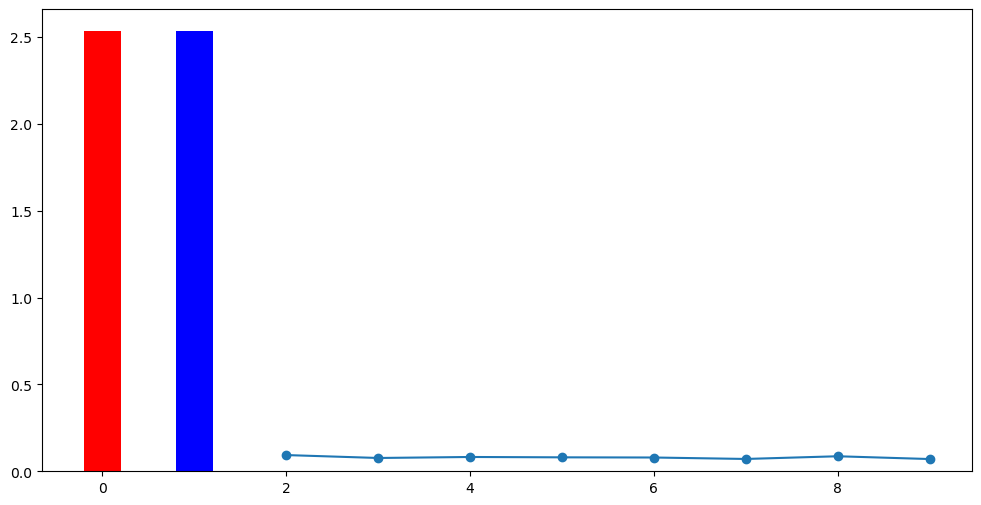



laufkont


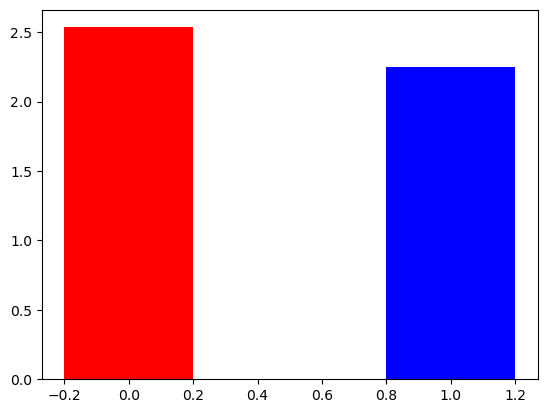



laufzeit


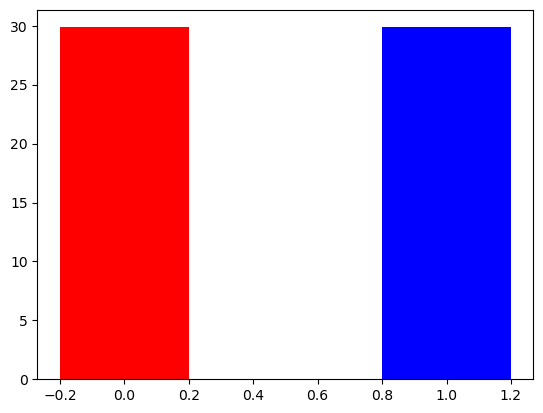



laufzeit


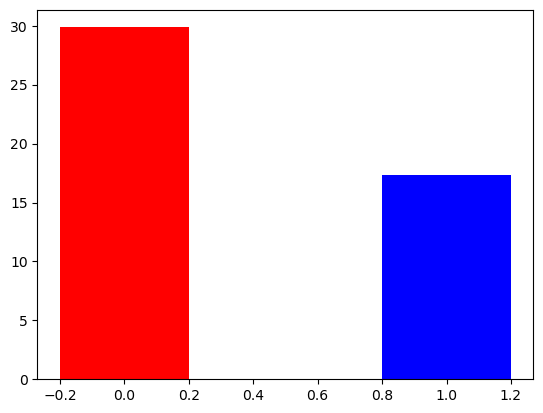



moral


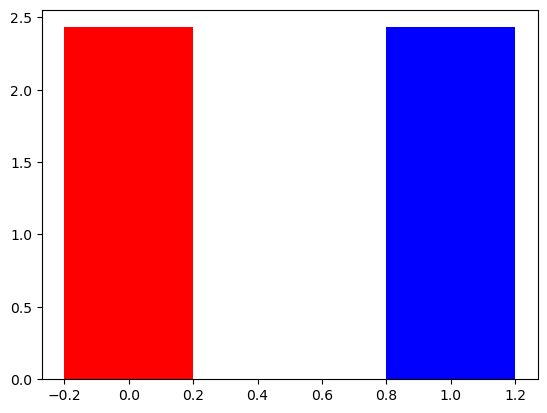



moral


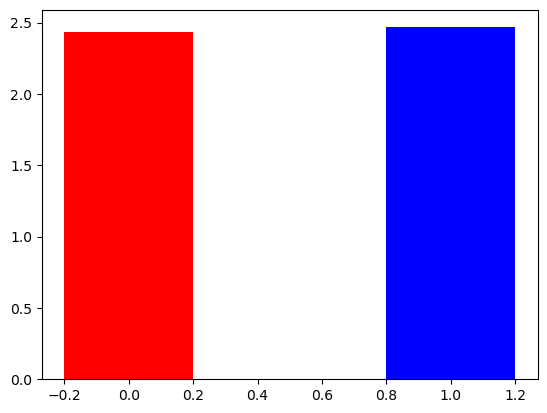



verw


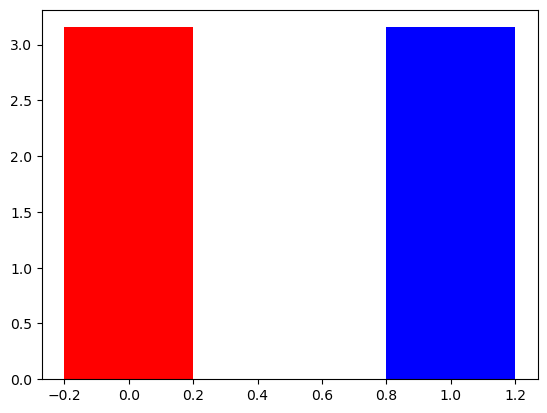



verw


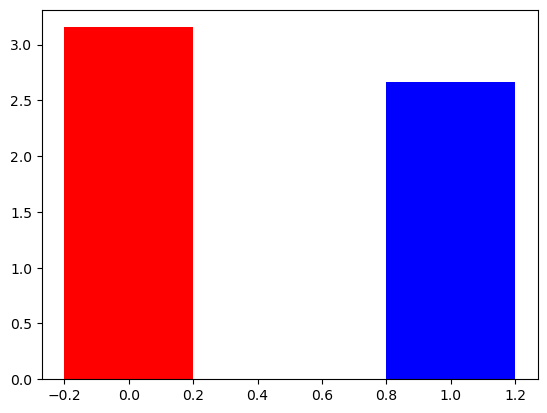



hoehe


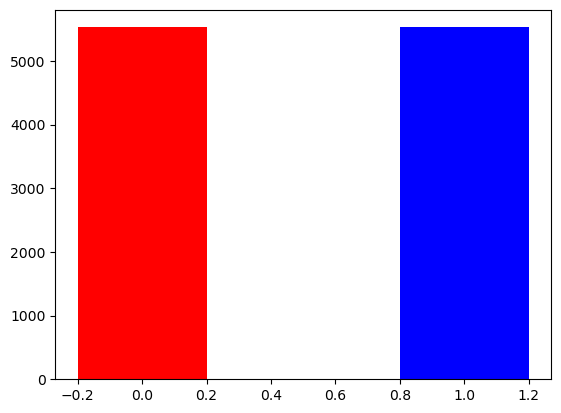



hoehe


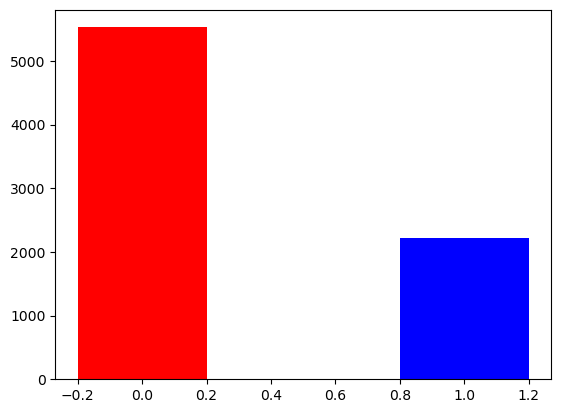



sparkont


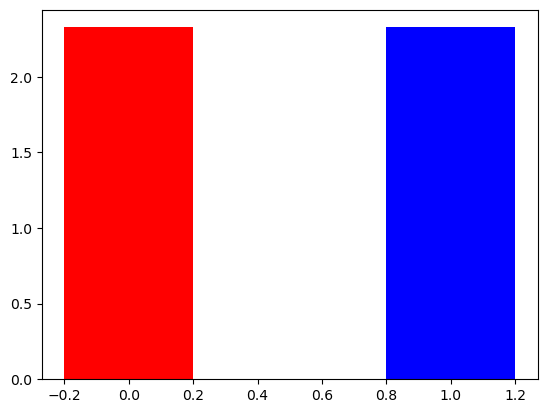



sparkont


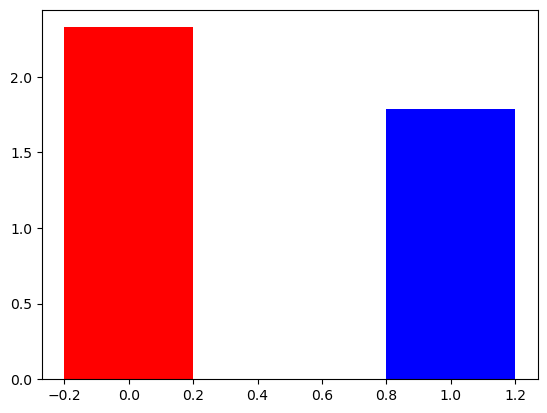



beszeit


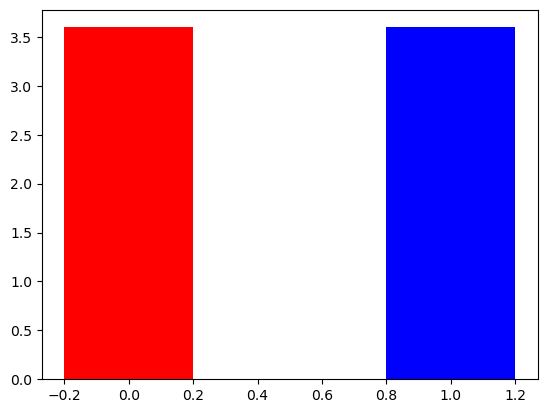



beszeit


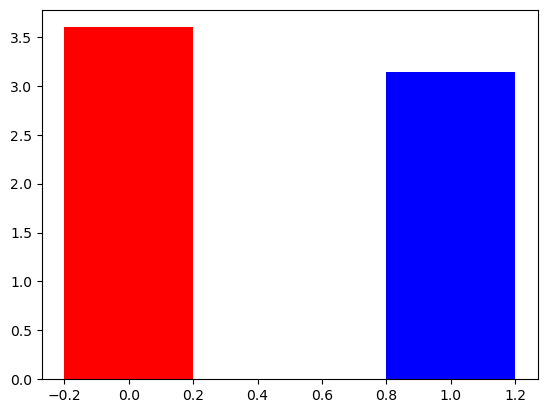



rate


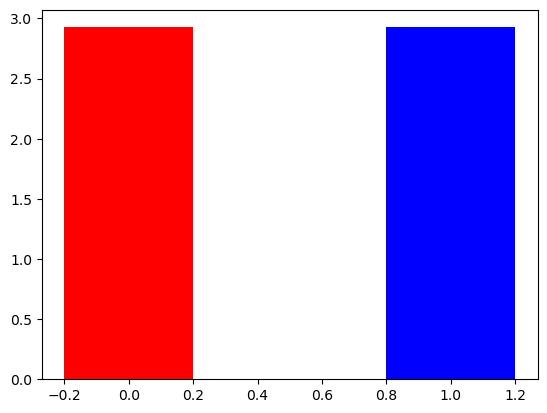



rate


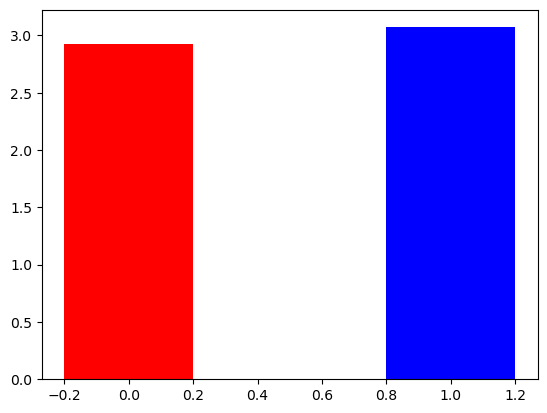



famges


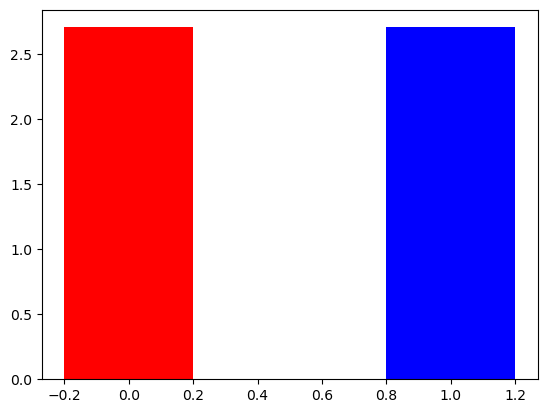



famges


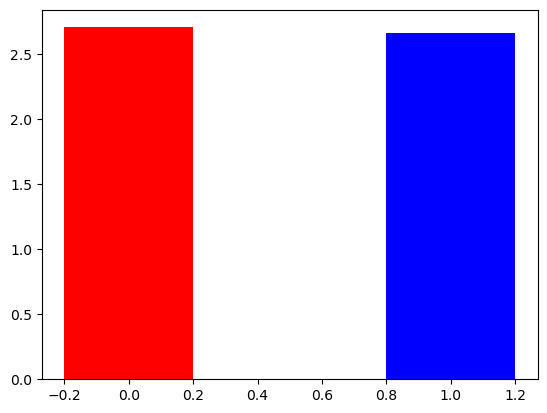



buerge


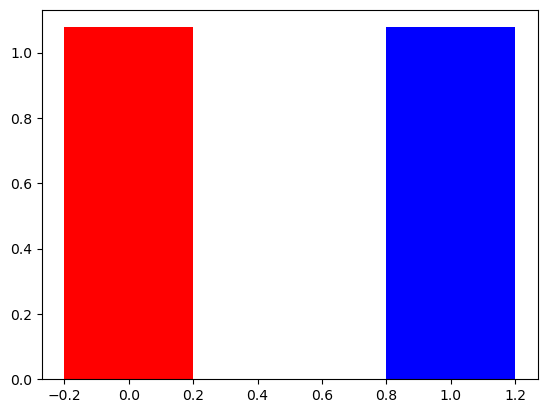



buerge


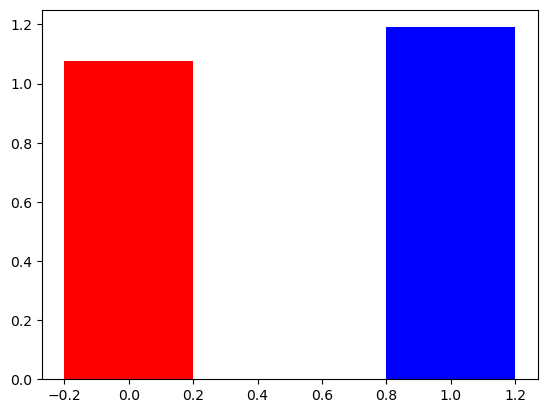



wohnzeit


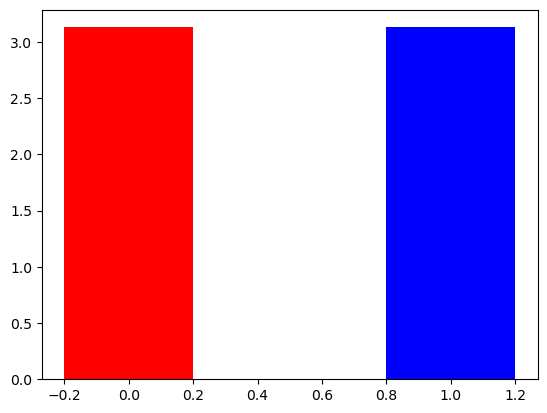



wohnzeit


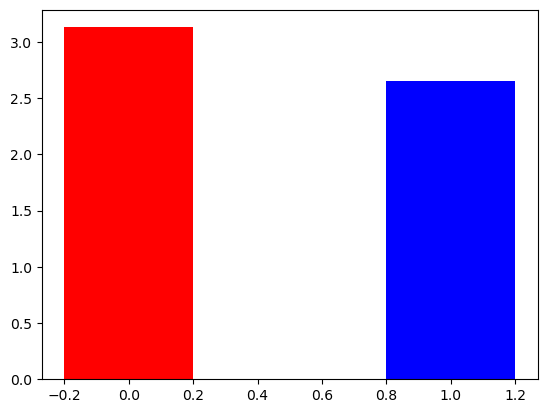



verm


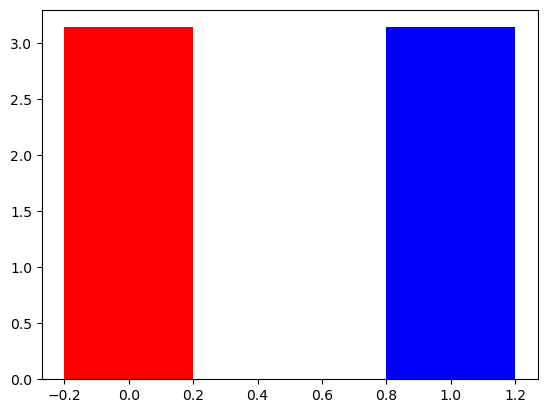



verm


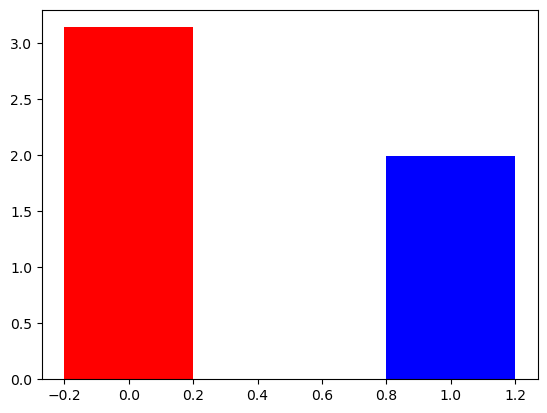



alter


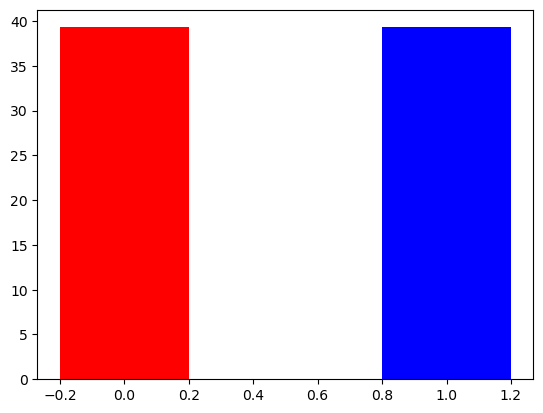



alter


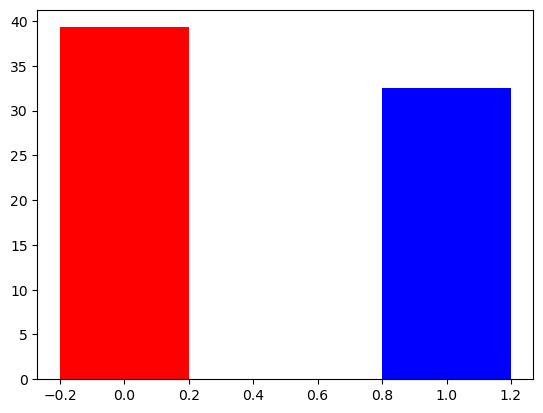



weitkred


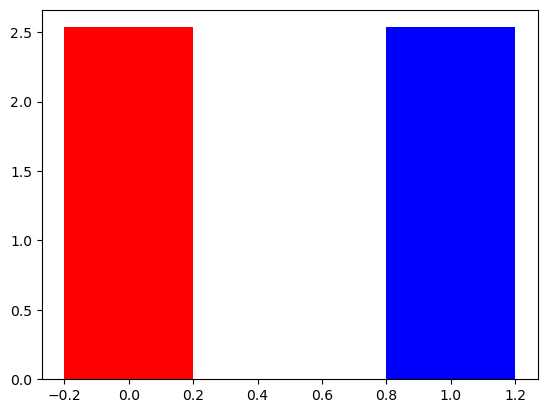



weitkred


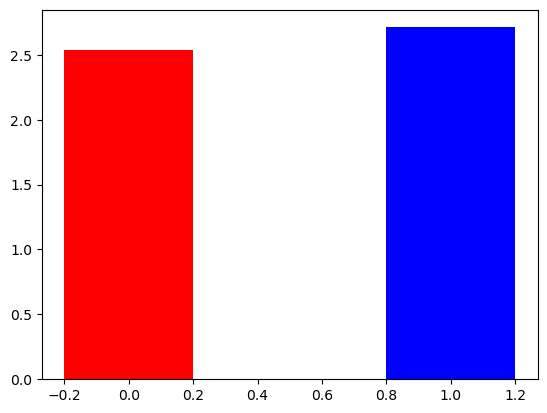



wohn


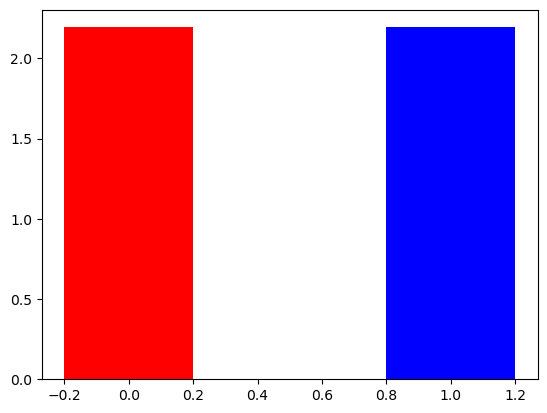



wohn


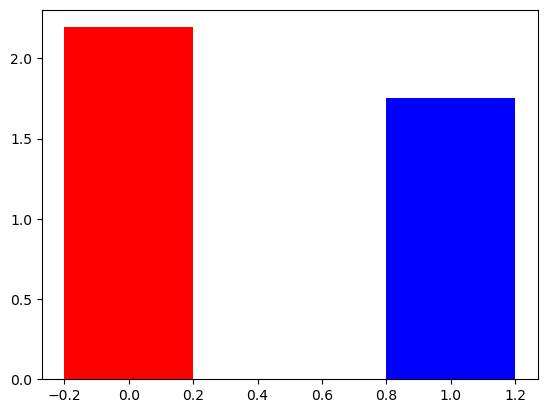



bishkred


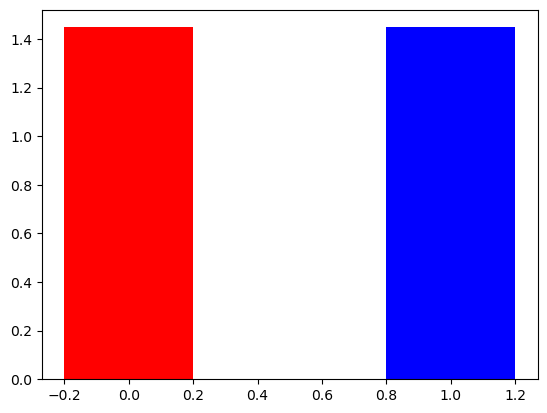



bishkred


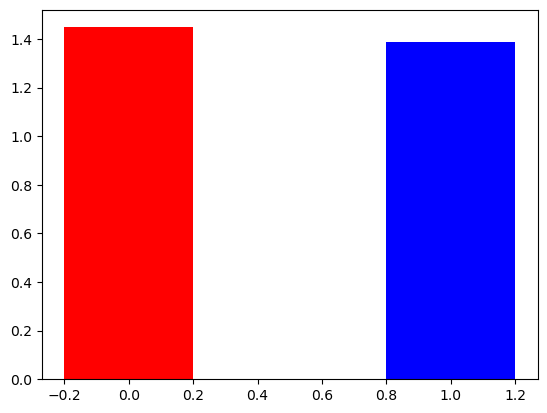



beruf


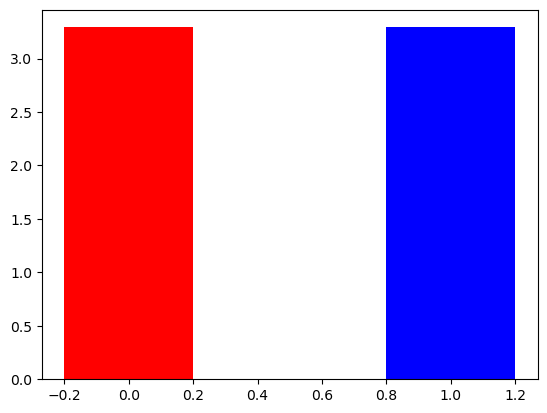



beruf


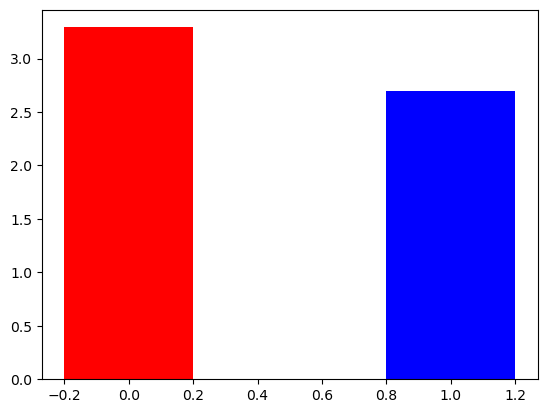



pers


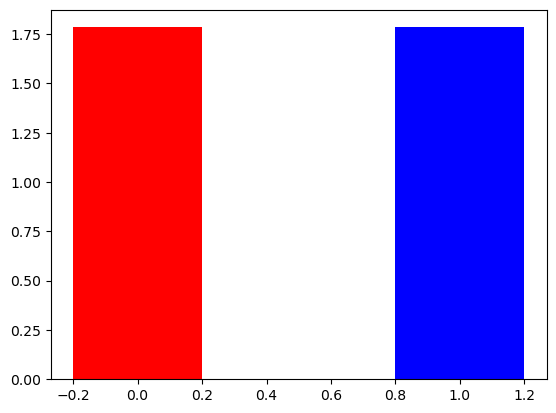



pers


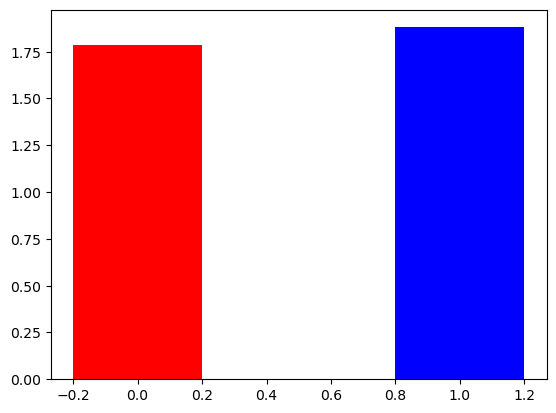



telef


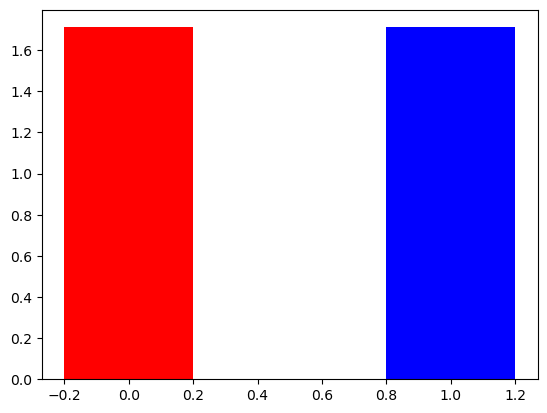



telef


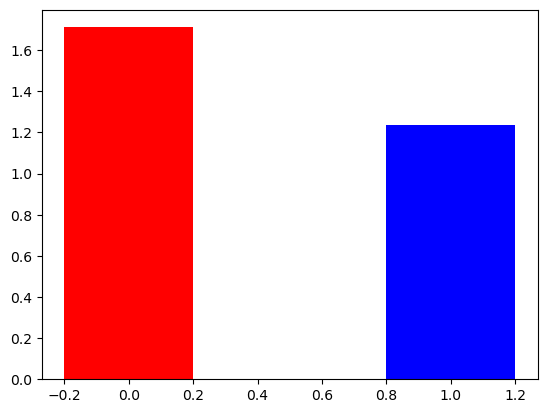



gastarb


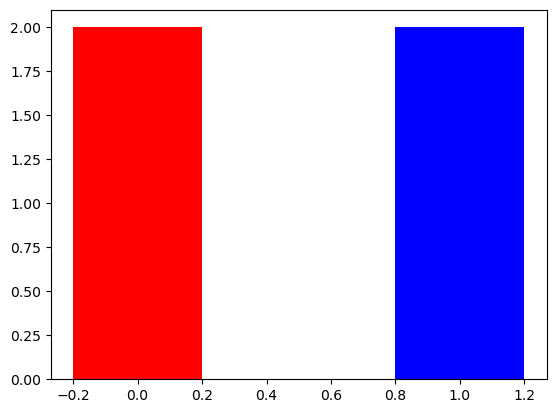



gastarb


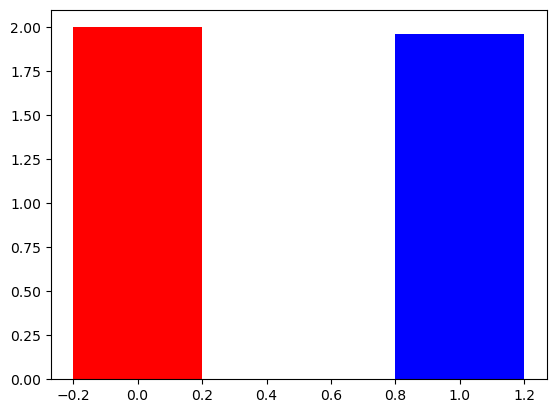



kredit


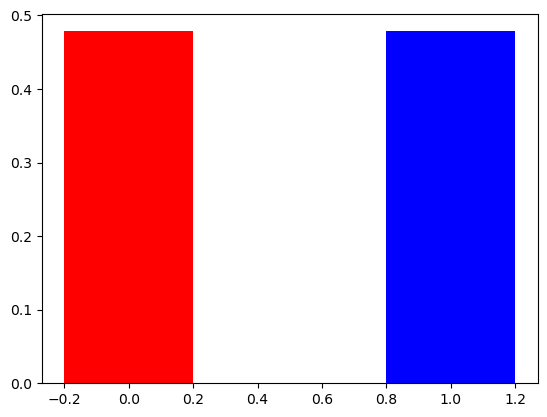



kredit


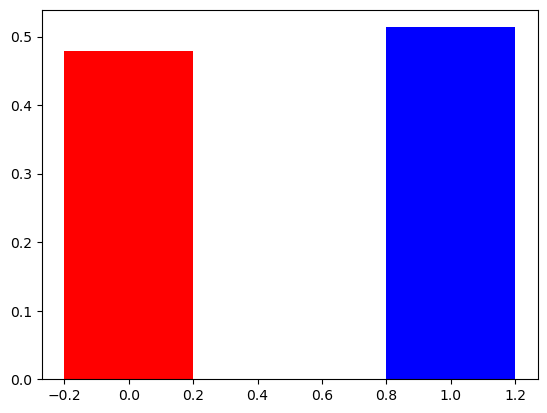



Cluster_Number


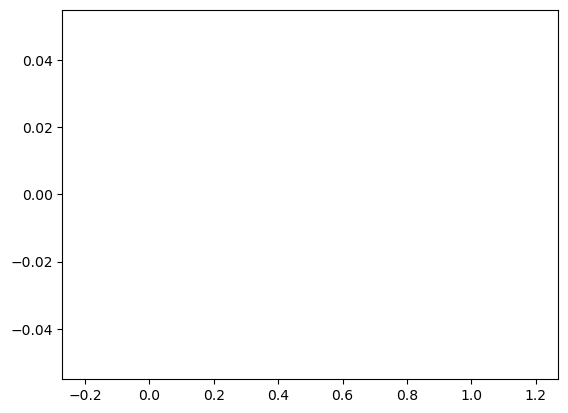



Cluster_Number


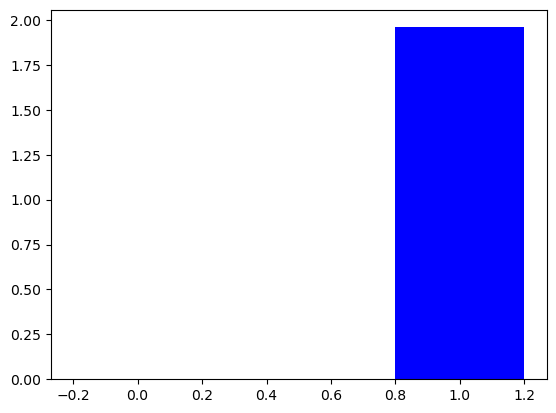



pred_


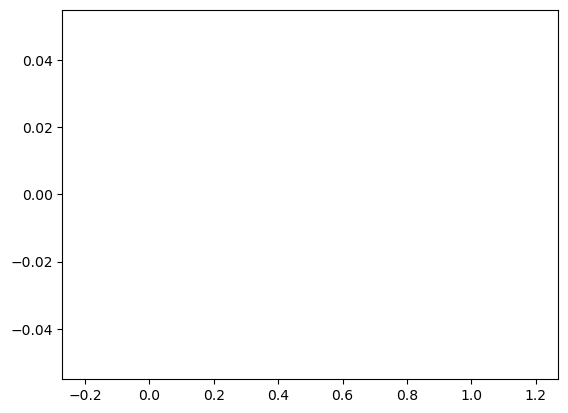



pred_


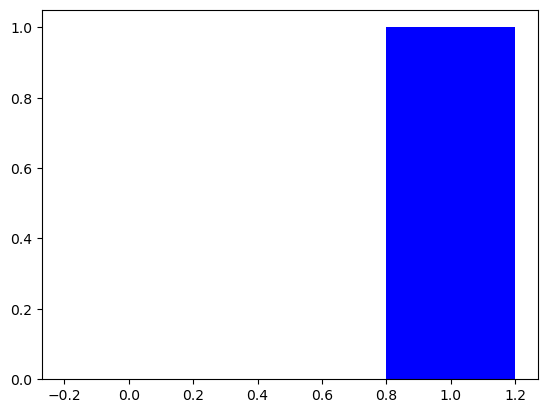

In [23]:
for col in trainData.columns:
  means_ = []

  for c in range(2):
    
    means_.append(trainData[trainData.pred_==c][col].mean())
    print(col)
    plt.bar(range(2), means_, color =['r','b'],
        width = 0.4)
    plt.show()
    print('\n')